### Heroes Of Pymoli Data Analysis

-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [93]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib as plt


file_to_load = "purchase_data.csv"
purchase_data_df = pd.read_csv("purchase_data.csv")

## Player Count

* Display the total number of players


In [9]:
player_total_df = purchase_data_df.drop_duplicates(subset = "SN")
print("Total number of players: " + str(len(player_total_df)))

Total number of players: 576


In [17]:
player_total_df = purchase_data_df.drop_duplicates(subset = "SN")
print("Total number of players: "+ (player_total_df["SN"].count()))

Total number of players: 576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [25]:
unique_items_count = purchase_data_df.drop_duplicates(subset = "Item ID")
print("There have been "+ str(len(unique_items_count)) + " unique items purchased during this period of time.")

#"${:,.2f}".format(amount)
price_avg = "${:,.2f}".format(unique_items_count["Price"].mean())
price_low = "${:,.2f}".format(unique_items_count["Price"].min())
price_high = "${:,.2f}".format(unique_items_count["Price"].max())
print("The average price of an item is " + str(price_avg) + ", and prices range from " + str(price_low) + " to " + str(price_high) + ".")

item_purchase_data_dict = {"Average Price":price_avg, "Lowest Price":price_low, "Highest Price":price_high}
item_purchase_data_dict_of_lists = {"Average Price": [price_avg], "Lowest Price": [price_low], "Highest Price": [price_high]}
item_purchase_data_summary_frame=pd.DataFrame(item_purchase_data_dict_of_lists)
item_purchase_data_summary_frame

There have been 183 unique items purchased during this period of time.
The average price of an item is $3.04, and prices range from $1.00 to $4.99.


,Average Price,Lowest Price,Highest Price
0,$3.04,$1.00,$4.99


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [57]:
male_players_df = player_total_df[player_total_df["Gender"] == "Male"]
print("Male players: " + str(len(male_players_df)))
female_players_df = player_total_df[player_total_df["Gender"] == "Female"]
print("Female players: " + str(len(female_players_df)))
other_players_df = player_total_df[player_total_df["Gender"] == "Other / Non-Disclosed"]
print("Players of other genders: " + str(len(other_players_df)))
percent_gender_players = pd.DataFrame(player_total_df["Gender"].value_counts(normalize=True).map("{:,.2f}%".format))
percent_gender_players

Male players: 484
Female players: 81
Players of other genders: 11


,Gender
Male,0.84%
Female,0.14%
Other / Non-Disclosed,0.02%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [106]:
players_by_gender_df = purchase_data_df.groupby("Gender")

avg_pur_price_gen_df = players_by_gender_df["Price"].mean()
appg_formatted_df = avg_pur_price_gen_df.map("${:,.2f}".format)
avg_ppg_df = pd.DataFrame(appg_formatted_df)
avg_ppg_df

,Price
Gender,
Female,$3.20
Male,$3.02
Other / Non-Disclosed,$3.35


In [113]:
tot_pur_price_gen_df = purchase_data_df.groupby("Gender")["Price"].sum()
tot_pur_price_gen_df_raw = tot_pur_price_gen_df.map("${:,.2f}".format)
tot_pur_price_gen_df_form = pd.DataFrame(tot_pur_price_gen_df_raw)
tot_pur_price_gen_df_form

,Price
Gender,
Female,$361.94
Male,"$1,967.64"
Other / Non-Disclosed,$50.19


In [124]:
purchasing_by_gender_df = purchase_data_df.groupby("Gender")["Price"].agg([min,max],"${:,.2f}".format)
purchasing_by_gender_df_2 = pd.DataFrame(purchasing_by_gender_df)
purchasing_by_gender_df_2

,min,max
Gender,,
Female,1.00,4.90
Male,1.00,4.99
Other / Non-Disclosed,1.33,4.75


In [125]:
summary_gender_purchasing = pd.merge(avg_ppg_df, tot_pur_price_gen_df_form, purchasing_by_gender_df_2, on="Gender")
summary_gender_purchasing

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
#Abbie's format: gender_demog['Percentage of Players']=gender_demog['Percentage of Players'].map("{:,.2f}%".format)

## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [139]:
age_bins = [0, 10, 20, 30, 40, 50]
age_bin_lb = ["1-10","11-20","21-30","31-40","41-50"]

players_by_age_df = pd.cut(player_total_df["Age"], age_bins, labels=age_bin_lb)
players_age_range_df = pd.DataFrame(players_by_age_df.value_counts())
players_age_range_df

,Age
21-30,291
11-20,191
31-40,63
1-10,24
41-50,7


,Total Count,Percentage of Players
<10,17,2.95
10-14,22,3.82
15-19,107,18.58
20-24,258,44.79
25-29,77,13.37
30-34,52,9.03
35-39,31,5.38
40+,12,2.08


In [135]:
age_range_count = purchase_data_df["Age_Range"].value_counts()
age_range_count

21-30    291
11-20    191
31-40     63
1-10      24
41-50      7
Name: Age_Range, dtype: int64

In [140]:
age_range_pct = (len(player_total_df)) / player_total_df["Age"].sum()*100


df_pct = df/df[df.columns].sum()*100

def age_range_percentage(Age_Range,decimals=2):
    assert decimals >=0
    return (round("Age Range"*100,decimals).astype(str) + "%"




## Purchasing Analysis (Age)

In [91]:






age_bins = [0, 10, 20, 30, 40, 50]
age_bin_lb = ["1-10","11-20","21-30","31-40","41-50"]

players_by_age_df = pd.cut(player_total_df["Age"], age_bins, labels=age_bin_lb)
purchase_data_df["Age_Range"] = pd.cut(player_total_df["Age"], age_bins, labels=age_bin_lb)
players_by_age_df

0      11-20
1      31-40
2      21-30
3      21-30
4      21-30
       ...  
773    21-30
774    11-20
775    21-30
777    11-20
778     1-10
Name: Age, Length: 576, dtype: category
Categories (5, object): ['1-10' < '11-20' < '21-30' < '31-40' < '41-50']

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [ ]:
grp_age_range_pur_data_df = purchase_data_df.groupby("Age_Range")
grp_age_range_pur_data_df[]

grouped_speed_vehicles_df = vehicles_df.groupby("Speed")
grouped_speed_vehicles_df[["Horsepower", "Torque (lb-ft)"]].mean()

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19
<10,23,$3.35,$77.13,$4.54


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [8]:
top_spenders = purchase_data_df.groupby("SN")([])

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [9]:
most_popular_items_df = purchase_data_df[[["Item ID", "Item Name", "Item Price"]]]
most_popular_items_df.groupby["Item ID","Item Name"]


,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80


<AxesSubplot:title={'center':'Age vs Item Price'}, xlabel='Age (yrs)', ylabel='Price'>

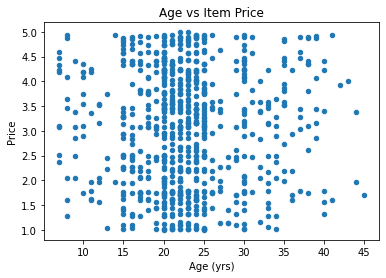

In [105]:
purchase_data_df.plot(x="Age",
              y="Price",
              kind="scatter",title="Age vs Item Price", xlabel="Age (yrs)")


In [ ]:
# I created the scatterplot "Age vs Item Price" to find out whether there is a correlation between a person's age and 
#the amount they would spend on an item. The scatterplot doesn't show that there is a correlation, but it does help us
#understand visually that the majority of the people in the data set are between the ages of 20 and 25 and
#buy items across the entire price range.

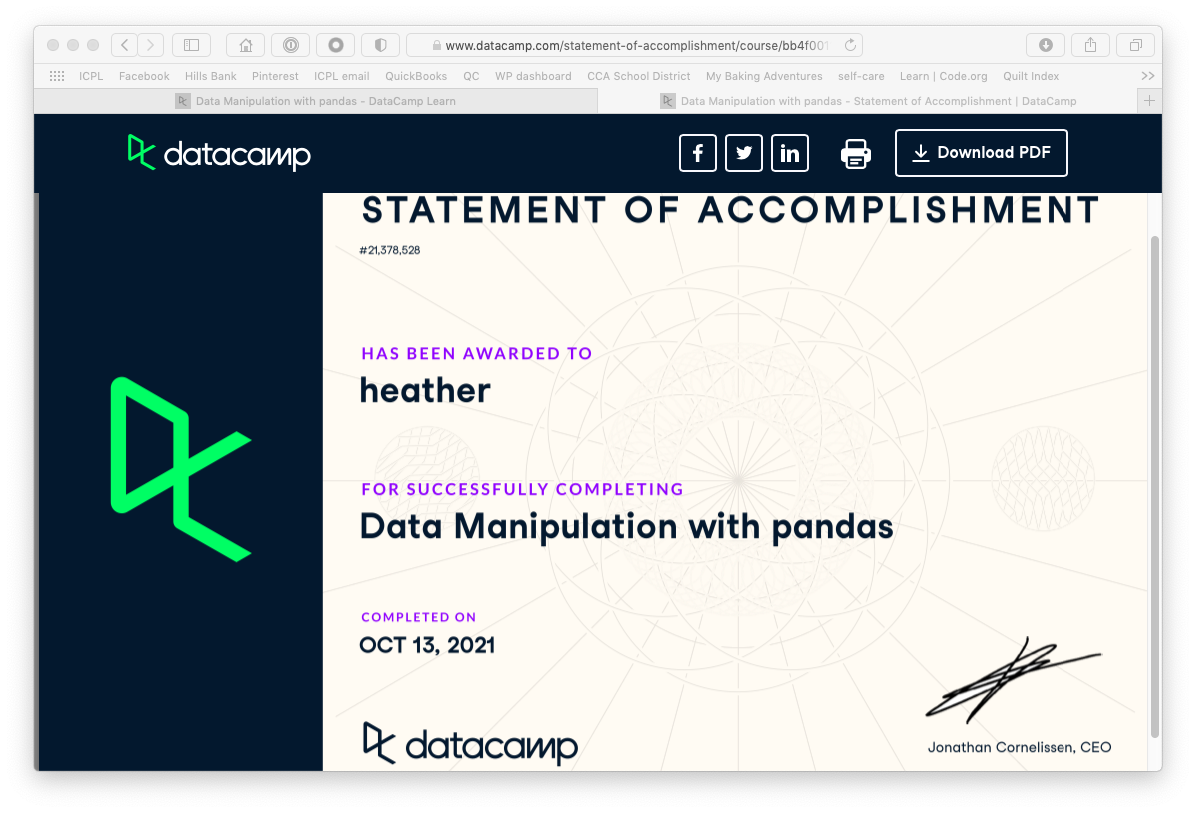

In [ ]:
items_by_gender_df = purchase_data_df.groupby("Gender")
items_by_gender_2df = items_by_gender_df["SN"]
items_pur_by_SN_df = pd.DataFrame(items_by_gender_2df.count())
items_pur_by_SN_df



#"${:,.2f}".format(amount)
price_avg = "${:,.2f}".format(unique_items_count["Price"].mean())
price_low = "${:,.2f}".format(unique_items_count["Price"].min())
price_high = "${:,.2f}".format(unique_items_count["Price"].max())
print("The average price of an item is " + str(price_avg) + ", and prices range from " + str(price_low) + " to " + str(price_high) + ".")

item_purchase_data_dict = {"Average Price":price_avg, "Lowest Price":price_low, "Highest Price":price_high}
item_purchase_data_dict_of_lists = {"Average Price": [price_avg], "Lowest Price": [price_low], "Highest Price": [price_high]}
item_purchase_data_summary_frame=pd.DataFrame(item_purchase_data_dict_of_lists)
item_purchase_data_summary_frame